<a href="https://colab.research.google.com/github/maneeshdisodia/DearML/blob/master/keras_churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Complete-Deep-Learning/master/ANN/Churn_Modelling.csv')

In [ ]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
X =dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [ ]:
geography =pd.get_dummies(X.Geography,drop_first = True)
gender =pd.get_dummies(X.Gender,drop_first = True)

In [ ]:
X =pd.concat([X,geography,gender],axis =1)

In [ ]:
X.drop(['Geography','Gender'],axis =1, inplace =True)

In [ ]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split   

In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.2,random_state =101)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train =sc.fit_transform(X_train)

In [ ]:
X_test = sc.fit_transform(X_test)

In [ ]:
import  tensorflow.keras as keras

In [ ]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU

In [ ]:
from keras.layers import Dropout

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(units =6,kernel_initializer = "he_uniform",activation='relu',input_dim =11))

In [ ]:
classifier.add(Dense(units =6,kernel_initializer = "he_uniform",activation='relu'))
classifier.add(Dense(units =1,kernel_initializer = "glorot_uniform",activation='sigmoid'))

In [ ]:
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_history = classifier.fit(X_train,y_train,validation_split =0.3,batch_size = 10,epochs=200)

Epoch 1/200
560/560 [==============================] - 16s 2ms/step - loss: 0.7555 - accuracy: 0.6124 - val_loss: 0.4878 - val_accuracy: 0.8004
Epoch 2/200
560/560 [==============================] - 1s 2ms/step - loss: 0.4931 - accuracy: 0.7875 - val_loss: 0.4497 - val_accuracy: 0.8000
Epoch 3/200
560/560 [==============================] - 1s 1ms/step - loss: 0.4568 - accuracy: 0.7956 - val_loss: 0.4325 - val_accuracy: 0.8071
Epoch 4/200
560/560 [==============================] - 1s 2ms/step - loss: 0.4481 - accuracy: 0.8009 - val_loss: 0.4219 - val_accuracy: 0.8133
Epoch 5/200
560/560 [==============================] - 1s 2ms/step - loss: 0.4239 - accuracy: 0.8149 - val_loss: 0.4123 - val_accuracy: 0.8188
Epoch 6/200
560/560 [==============================] - 1s 2ms/step - loss: 0.4193 - accuracy: 0.8165 - val_loss: 0.4040 - val_accuracy: 0.8221
Epoch 7/200
560/560 [==============================] - 1s 2ms/step - loss: 0.3987 - accuracy: 0.8292 - val_loss: 0.3989 - val_accuracy: 0.825

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

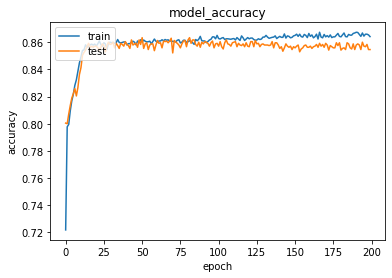

In [ ]:
plt.plot( model_history.history['accuracy'])
plt.plot( model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred = (y_pred >0.5)

In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1577
           1       0.79      0.48      0.60       423

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.86      0.85      2000

